### Loading Data

In [2]:
import urllib
from scipy import stats
from pandas import Series, DataFrame
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

path = 'http://archive.ics.uci.edu/ml/machine-learning-databases/mushroom/agaricus-lepiota.data'
raw_csv = urllib.request.urlopen(path)
col_names = range(23)
df = pd.read_csv(raw_csv, names = col_names)
print(len(df))


8124


### 데이터 확인

In [4]:
df.head()

,0,1,2,3,4,5,6,7,8,9,...,13,14,15,16,17,18,19,20,21,22
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


### Categorical Attribute를 Numerical Attribute로 전환

In [5]:
num_columns = df.shape[1]
map_dic = {}
for i in range(num_columns):
    unique_array = df[i].unique()
    N = len(unique_array)
    map_dic[i] = {}
    for j in range(N):
        map_dic[i][unique_array[j]] = j
    df[i] = df[i].map(map_dic[i])


### 데이터 확인

In [6]:
df.head()

,0,1,2,3,4,5,6,7,8,9,...,13,14,15,16,17,18,19,20,21,22
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,1,0,1,0,0,1,0,...,0,0,0,0,0,0,0,1,1,1
2,1,1,0,2,0,2,0,0,1,1,...,0,0,0,0,0,0,0,1,1,2
3,0,0,1,2,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,3,1,3,0,1,1,0,...,0,0,0,0,0,0,1,1,2,1


### 각 컬럼별 Normalization

In [7]:
for i in range(1, num_columns):
    unique_array = df[i].unique()
    N = len(unique_array)
    map_dic_sub = {}
    for j in range(N):
        if j == 0:
            map_dic_sub[j] = 0
        else:
            map_dic_sub[j] = j / float(N - 1)        
    df[i] = df[i].map(map_dic_sub)


### 데이터 확인

In [8]:
df.head()

,0,1,2,3,4,5,6,7,8,9,...,13,14,15,16,17,18,19,20,21,22
0,0,0.0,0.000000,0.000000,0.0,0.000,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0,0.0,0.0,0.00,0.000,0.0,0.000000
1,1,0.0,0.000000,0.111111,0.0,0.125,0.0,0.0,1.0,0.000000,...,0.0,0.0,0.0,0,0.0,0.0,0.00,0.125,0.2,0.166667
2,1,0.2,0.000000,0.222222,0.0,0.250,0.0,0.0,1.0,0.090909,...,0.0,0.0,0.0,0,0.0,0.0,0.00,0.125,0.2,0.333333
3,0,0.0,0.333333,0.222222,0.0,0.000,0.0,0.0,0.0,0.090909,...,0.0,0.0,0.0,0,0.0,0.0,0.00,0.000,0.0,0.000000
4,1,0.0,0.000000,0.333333,1.0,0.375,0.0,1.0,1.0,0.000000,...,0.0,0.0,0.0,0,0.0,0.0,0.25,0.125,0.4,0.166667


### 데이터 전처리 작업

In [9]:
data_df = df.iloc[:, 1:]


### 데이터 확인

In [10]:
data_df.head()


,1,2,3,4,5,6,7,8,9,10,...,13,14,15,16,17,18,19,20,21,22
0,0.0,0.000000,0.000000,0.0,0.000,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0,0.0,0.0,0.00,0.000,0.0,0.000000
1,0.0,0.000000,0.111111,0.0,0.125,0.0,0.0,1.0,0.000000,0.0,...,0.0,0.0,0.0,0,0.0,0.0,0.00,0.125,0.2,0.166667
2,0.2,0.000000,0.222222,0.0,0.250,0.0,0.0,1.0,0.090909,0.0,...,0.0,0.0,0.0,0,0.0,0.0,0.00,0.125,0.2,0.333333
3,0.0,0.333333,0.222222,0.0,0.000,0.0,0.0,0.0,0.090909,0.0,...,0.0,0.0,0.0,0,0.0,0.0,0.00,0.000,0.0,0.000000
4,0.0,0.000000,0.333333,1.0,0.375,0.0,1.0,1.0,0.000000,1.0,...,0.0,0.0,0.0,0,0.0,0.0,0.25,0.125,0.4,0.166667


In [12]:
data_array = data_df.as_matrix()
print(type(data_array), data_array.shape)

<class 'numpy.ndarray'> (8124, 22)


In [13]:
label_df = df.iloc[:, 0:1]
label_df.head()

,0
0,0
1,1
2,1
3,0
4,1


In [14]:
label_array = label_df.as_matrix()
print(type(label_array), label_array.shape)

<class 'numpy.ndarray'> (8124, 1)


In [15]:
label_array_one_hot = []
for i in label_array:
    if i == 0:
        one_hot = [1, 0]
    else:
        one_hot = [0, 1]
    label_array_one_hot.append(one_hot)

In [17]:
label_array_one_hot =  np.array(label_array_one_hot)
print(type(label_array_one_hot), label_array_one_hot.shape)

<class 'numpy.ndarray'> (8124, 2)


In [18]:
train = {'data': None, 'labels': None}
validation = {'data': None, 'labels': None}
test = {'data': None, 'labels': None}

In [19]:
import random
pick = random.random()
train_data = []
train_labels = []
validation_data = []
validation_labels = []
test_data = []
test_labels = []
for i in range(len(data_array)):
    pick = random.random()
    if pick < 0.80:
        train_data.append(data_array[i])
        train_labels.append(label_array_one_hot[i])
    elif pick >= 0.80 and pick < 0.85:
        validation_data.append(data_array[i])
        validation_labels.append(label_array_one_hot[i])
    elif pick >= 0.85:
        test_data.append(data_array[i])
        test_labels.append(label_array_one_hot[i])
        
train['data'] = np.array(train_data)
train['labels'] = np.array(train_labels)
validation['data'] = np.array(validation_data)
validation['labels'] = np.array(validation_labels)
test['data'] = np.array(test_data)
test['labels'] = np.array(test_labels)


In [20]:
print(train['data'].shape, train['labels'].shape)
print(validation['data'].shape, validation['labels'].shape)
print(test['data'].shape, test['labels'].shape)

(6462, 22) (6462, 2)
(459, 22) (459, 2)
(1203, 22) (1203, 2)


### Multi-layer Neural Network 모델 생성 및 테스트하기

Total batch: 65
Epoch:  0, Train Error: 126.25900, Validation Error: 122.21427, Test Accuracy: 0.48462
Epoch:  1, Train Error: 4.95896, Validation Error: 4.04907, Test Accuracy: 0.92103
Epoch:  2, Train Error: 0.01124, Validation Error: 0.00014, Test Accuracy: 0.99834
Epoch:  3, Train Error: 0.00195, Validation Error: 0.00007, Test Accuracy: 0.99917
Epoch:  4, Train Error: 0.00034, Validation Error: 0.00005, Test Accuracy: 1.00000
Epoch:  5, Train Error: 0.00011, Validation Error: 0.00003, Test Accuracy: 1.00000
Epoch:  6, Train Error: 0.00005, Validation Error: 0.00008, Test Accuracy: 1.00000
Epoch:  7, Train Error: 0.00004, Validation Error: 0.00007, Test Accuracy: 1.00000
Epoch:  8, Train Error: 0.00004, Validation Error: 0.00006, Test Accuracy: 1.00000
Epoch:  9, Train Error: 0.00003, Validation Error: 0.00008, Test Accuracy: 1.00000
Epoch: 10, Train Error: 0.00003, Validation Error: 0.00008, Test Accuracy: 1.00000
Epoch: 11, Train Error: 0.00003, Validation Error: 0.00007, Test Ac

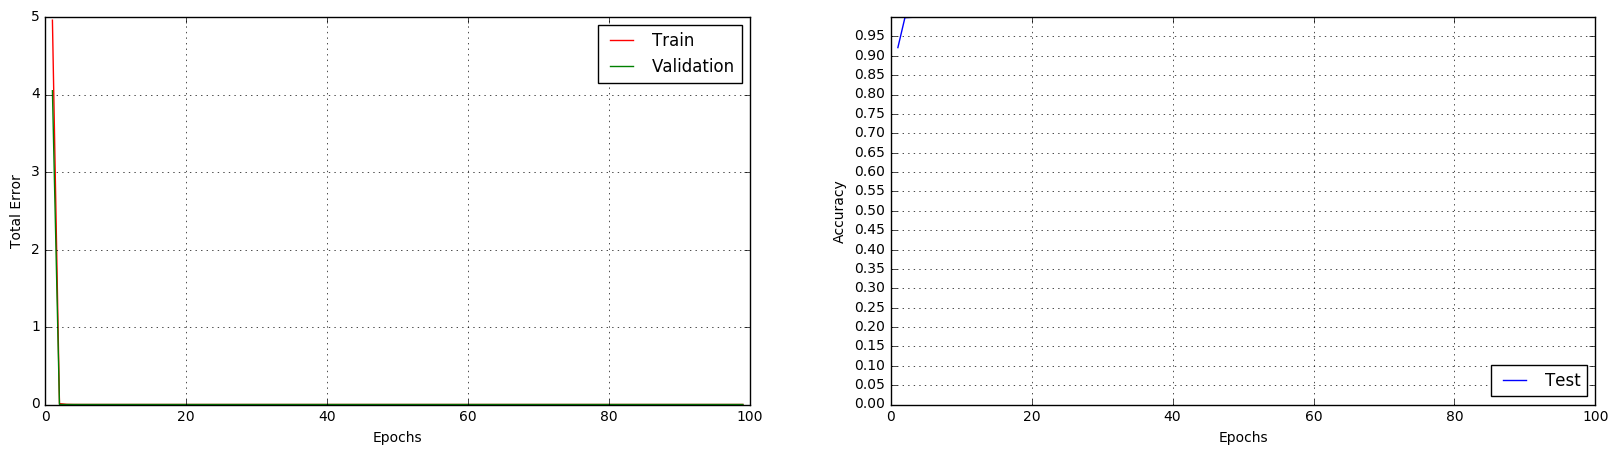

NameError: name 'mnist' is not defined

In [29]:
import numpy as np
import matplotlib.pyplot as plt
import math
import tensorflow as tf

batch_size = 100
training_epochs = 100
learning_rate = 0.05

epoch_list = []
train_error_list = []
validation_error_list = []
test_accuracy_list = []
diff_index_list = []

# Network Parameters
n_input = 22 # MNIST data input (img shape: 28*28)
n_hidden_1 = 128 # 1st layer number of features
n_hidden_2 = 128 # 2nd layer number of features
n_classes = 2 # MNIST total classes (0-9 digits)
    
# Data Preparation
x = tf.placeholder(tf.float32, [None, n_input])
y_target = tf.placeholder(tf.float32, [None, n_classes])

# Model Construction
# Store layers weight & bias
weights = {
    'W1': tf.Variable(tf.random_normal([n_input, n_hidden_1])),
    'W2': tf.Variable(tf.random_normal([n_hidden_1, n_hidden_2])),
    'out': tf.Variable(tf.random_normal([n_hidden_2, n_classes]))
}

biases = {
    'b1': tf.Variable(tf.random_normal([n_hidden_1])),
    'b2': tf.Variable(tf.random_normal([n_hidden_2])),
    'out': tf.Variable(tf.random_normal([n_classes]))
}

# 1st Hidden layer with RELU activation
u2 = tf.matmul(x, weights['W1']) + biases['b1']
z2 = tf.nn.relu(u2)

# 2ndHidden layer with RELU activation
u3 = tf.matmul(z2, weights['W2']) + biases['b2']
z3 = tf.nn.relu(u3)

# Output layer with linear activation
u_out = tf.matmul(z3, weights['out']) + biases['out']

# Target Setup
error = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=u_out, labels=y_target))
optimizer = tf.train.GradientDescentOptimizer(learning_rate).minimize(error)

# Accuracy   
prediction_and_ground_truth = tf.equal(tf.argmax(u_out, 1), tf.argmax(y_target, 1))
accuracy = tf.reduce_mean(tf.cast(prediction_and_ground_truth, tf.float32))

_index_in_epoch = 0
_epochs_completed = 0
_num_examples = train['data'].shape[0]

def next_train_batch(batch_size):
    global _index_in_epoch
    global _epochs_completed
    global _num_examples
    
    start = _index_in_epoch
    _index_in_epoch += batch_size
    if _index_in_epoch > _num_examples:
        # Finished epoch
        _epochs_completed += 1
        # Shuffle the data
        perm = np.arange(_num_examples)
        np.random.shuffle(perm)
        train['data'] = train['data'][perm]
        train['labels'] = train['labels'][perm]
        # Start next epoch
        start = 0
        _index_in_epoch = batch_size
        assert batch_size <= _num_examples
    end = _index_in_epoch
    return train['data'][start:end], train['labels'][start:end]


def draw_error_values_and_accuracy():
    # Draw Error Values and Accuracy
    fig = plt.figure(figsize=(20, 5))
    plt.subplot(121)
    plt.plot(epoch_list[1:], train_error_list[1:], 'r', label='Train')
    plt.plot(epoch_list[1:], validation_error_list[1:], 'g', label='Validation')
    plt.ylabel('Total Error')
    plt.xlabel('Epochs')
    plt.grid(True)
    plt.legend(loc='upper right')

    plt.subplot(122)
    plt.plot(epoch_list[1:], test_accuracy_list[1:], 'b', label='Test')
    plt.ylabel('Accuracy')
    plt.xlabel('Epochs')
    plt.yticks(np.arange(0.0, 1.0, 0.05))
    plt.grid(True)
    plt.legend(loc='lower right')
    plt.show()
    
    
with tf.Session() as sess:
    init = tf.global_variables_initializer()
    sess.run(init)
    
    total_batch = int(math.ceil(6462/float(batch_size)))
    print("Total batch: %d" % total_batch)    

    for epoch in range(training_epochs):
        epoch_list.append(epoch)
        # Train Error Value
        train_error_value = sess.run(error, feed_dict={x: train['data'], y_target: train['labels']})
        train_error_list.append(train_error_value)
        
        validation_error_value = sess.run(error, feed_dict={x: validation['data'], y_target: validation['labels']})
        validation_error_list.append(validation_error_value)
        
        test_accuracy_value = sess.run(accuracy, feed_dict={x: test['data'], y_target: test['labels']})
        test_accuracy_list.append(test_accuracy_value) 
        print("Epoch: {0:2d}, Train Error: {1:0.5f}, Validation Error: {2:0.5f}, Test Accuracy: {3:0.5f}".format(epoch, train_error_value, validation_error_value, test_accuracy_value))
        
        for i in range(total_batch):
            batch_images, batch_labels = next_train_batch(batch_size)
            sess.run(optimizer, feed_dict={x: batch_images, y_target: batch_labels})
    

    # Draw Graph about Error Values & Accuracy Values
    draw_error_values_and_accuracy()
    
    # False Prediction Profile
    prediction = sess.run(tf.argmax(u_out, 1), feed_dict={x:mnist.test.images})
    ground_truth = sess.run(tf.argmax(y_target, 1), feed_dict={y_target:mnist.test.labels})

    print(prediction)
    print(ground_truth)

    for i in range(mnist.test.num_examples):
        if (prediction[i] != ground_truth[i]):
            diff_index_list.append(i)
            
    print("Number of False Prediction:", len(diff_index_list))
    draw_false_prediction()

